# RQ1

In [1]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.metrics import f1_score

In [2]:
results_moralexceptqa = pd.DataFrame(columns=["model", "chinese_f1", "english_f1", "german_f1", "hindi_f1", "spanish_f1", "urdu_f1", "chinese_cr", "english_cr", "german_cr", "hindi_cr", "spanish_cr", "urdu_cr"])

results_ethics_cs = pd.DataFrame(columns=["model", "chinese_f1", "english_f1", "german_f1", "hindi_f1", "spanish_f1", "urdu_f1", "chinese_cr", "english_cr", "german_cr", "hindi_cr", "spanish_cr", "urdu_cr"])
results_ethics_deo = pd.DataFrame(columns=["model", "chinese_f1", "english_f1", "german_f1", "hindi_f1", "spanish_f1", "urdu_f1", "chinese_cr", "english_cr", "german_cr", "hindi_cr", "spanish_cr", "urdu_cr"])
results_ethics_justice = pd.DataFrame(columns=["model", "chinese_f1", "english_f1", "german_f1", "hindi_f1", "spanish_f1", "urdu_f1", "chinese_cr", "english_cr", "german_cr", "hindi_cr", "spanish_cr", "urdu_cr"])
results_ethics_util = pd.DataFrame(columns=["model", "chinese_f1", "english_f1", "german_f1", "hindi_f1", "spanish_f1", "urdu_f1", "chinese_cr", "english_cr", "german_cr", "hindi_cr", "spanish_cr", "urdu_cr"])
results_ethics_virtue = pd.DataFrame(columns=["model", "chinese_f1", "english_f1", "german_f1", "hindi_f1", "spanish_f1", "urdu_f1", "chinese_cr", "english_cr", "german_cr", "hindi_cr", "spanish_cr", "urdu_cr"])

In [3]:
languages = ["chinese", "english", "german", "hindi", "spanish", "urdu"]
model_names = ["3_2", "3_1", "OLMo_2", "Phi", "Mistral", "Qwen2_5", "deepseek"]

In [4]:
# MoralExceptQA
base_file_path = "/shared/2/projects/moral-project/MEQ_Results/"
results_f1 = {model : {lang: 0 for lang in languages} for model in model_names}
results_cr = {model : {lang: 0 for lang in languages} for model in model_names}
for fname in os.listdir(base_file_path):
    if "metrics" in fname:
        continue

    if "scenario" in fname:
        lang = "english"
    else:
        for lang in languages:
            if lang.lower() in fname.lower():
                break
    if "OLMo-2" in fname:
        model = "OLMo_2"
    else:
        for model in model_names:
            if model.lower() in fname.lower():
                break
    
    with open(base_file_path+fname, "r") as f:
        data = json.load(f)

    parsed = [r for r in data if r["parsed_answer"] in {0, 1}]
    predictions = [r["parsed_answer"] for r in parsed]
    references = [r["reference"] for r in parsed]
    compliance = sum(r["valid"] for r in data) / len(data) if data else 0.0

    results_f1[model][lang] = round(f1_score(references, predictions, average="weighted") if parsed else 0.0, 3)
    results_cr[model][lang] = round(compliance, 3)

for model in model_names:
    # "model", "chinese_f1", "english_f1", "german_f1", "hindi_f1", "spanish_f1", "urdu_f1", "chinese_cr", "english_cr", "german_cr", "hindi_cr", "spanish_cr", "urdu_cr"
    row = [model, results_f1[model]["chinese"], results_f1[model]["english"], results_f1[model]["german"], results_f1[model]["hindi"], results_f1[model]["spanish"], results_f1[model]["urdu"], results_cr[model]["chinese"], results_cr[model]["english"], results_cr[model]["german"], results_cr[model]["hindi"], results_cr[model]["spanish"], results_cr[model]["urdu"]]
    results_moralexceptqa.loc[len(results_moralexceptqa)] = row

In [5]:
results_moralexceptqa

,model,chinese_f1,english_f1,german_f1,hindi_f1,spanish_f1,urdu_f1,chinese_cr,english_cr,german_cr,hindi_cr,spanish_cr,urdu_cr
0,3_2,0.635,0.605,0.696,0.587,0.658,0.506,0.986,0.493,1.000,0.959,0.926,0.885
1,3_1,0.628,0.706,0.624,0.621,0.646,0.556,0.892,1.000,0.966,0.770,0.845,0.959
2,OLMo_2,0.713,0.680,0.674,0.612,0.653,0.712,1.000,0.973,0.966,0.986,0.993,0.986
3,Phi,0.622,0.700,0.500,0.499,0.324,0.560,1.000,1.000,0.034,0.514,0.432,0.980
4,Mistral,0.681,0.688,0.681,0.445,0.715,0.574,1.000,1.000,1.000,0.811,1.000,0.804
5,Qwen2_5,0.622,0.648,0.668,0.474,0.657,0.627,0.554,1.000,1.000,1.000,1.000,0.993
6,deepseek,0.169,0.657,0.723,0.359,0.685,0.229,0.142,0.831,0.932,0.392,0.858,0.500


In [6]:
# Ethics-CS
base_file_paths = ["/shared/2/projects/moral-project/ETHICS_Results_j/", "/shared/2/projects/moral-project/ETHICS_Results_sf/", "/shared/2/projects/moral-project/ETHICS_Results_z/"]
results_f1 = {model : {lang: 0 for lang in languages} for model in model_names}
results_cr = {model : {lang: 0 for lang in languages} for model in model_names}

for base_file_path in base_file_paths:
    for fname in os.listdir(base_file_path):
        # if "phi" in fname.lower() or "mistral" in fname.lower() or "llama" in fname.lower():
        #     if "fixed" not in fname:
        #         continue
        if "cms" not in fname.lower() and "commonsense" not in fname.lower():
            continue

        if "commonsense" not in fname:
            if "scenario" in fname:
                lang = "english"
            else:
                for lang in languages:
                    if lang.lower() in fname.lower():
                        break
        else:
            for lang in languages:
                if lang.lower() in fname.lower():
                    break

        for model in model_names:
            if model.lower() in fname.lower():
                break

        with open(base_file_path+fname, "r") as f:
            data = json.load(f)

        try:
            data = data["metrics"]
        except:
            data = data[-1]
            try:
                data = data["metrics"]
            except:
                data = data
            
        try:
            results_f1[model][lang] = round(data["f1_score"], 3)
        except:
            results_f1[model][lang] = round(data["f1 score"], 3)
        results_cr[model][lang] = round(data["compliance_rate"], 3)


for model in model_names:
    # "model", "chinese_f1", "english_f1", "german_f1", "hindi_f1", "spanish_f1", "urdu_f1", "chinese_cr", "english_cr", "german_cr", "hindi_cr", "spanish_cr", "urdu_cr"
    row = [model, results_f1[model]["chinese"], results_f1[model]["english"], results_f1[model]["german"], results_f1[model]["hindi"], results_f1[model]["spanish"], results_f1[model]["urdu"], results_cr[model]["chinese"], results_cr[model]["english"], results_cr[model]["german"], results_cr[model]["hindi"], results_cr[model]["spanish"], results_cr[model]["urdu"]]
    results_ethics_cs.loc[len(results_ethics_cs)] = row

In [7]:
results_ethics_cs

,model,chinese_f1,english_f1,german_f1,hindi_f1,spanish_f1,urdu_f1,chinese_cr,english_cr,german_cr,hindi_cr,spanish_cr,urdu_cr
0,3_2,0.635,0.707,0.642,0.450,0.634,0.528,0.962,0.792,0.994,0.762,0.991,0.685
1,3_1,0.634,0.767,0.684,0.576,0.662,0.527,0.995,1.000,0.988,0.915,0.993,0.904
2,OLMo_2,0.693,0.847,0.772,0.692,0.764,0.680,1.000,0.919,0.998,0.999,0.996,1.000
3,Phi,0.662,0.804,0.751,0.618,0.746,0.525,0.997,0.998,0.999,0.963,1.000,0.963
4,Mistral,0.641,0.767,0.617,0.464,0.673,0.354,1.000,0.999,1.000,0.774,1.000,0.991
5,Qwen2_5,0.668,0.778,0.723,0.678,0.728,0.562,0.997,1.000,0.999,0.677,0.998,0.935
6,deepseek,0.628,0.739,0.656,0.603,0.676,0.472,0.970,0.976,0.996,0.862,0.989,0.914


In [8]:
# Ethics-Deo
base_file_paths = ["/shared/2/projects/moral-project/ETHICS_Results_j/", "/shared/2/projects/moral-project/ETHICS_Results_sf/", "/shared/2/projects/moral-project/ETHICS_Results_z/"]
results_f1 = {model : {lang: 0 for lang in languages} for model in model_names}
results_cr = {model : {lang: 0 for lang in languages} for model in model_names}

for base_file_path in base_file_paths:
    for fname in os.listdir(base_file_path):
        # if "phi" in fname.lower() or "mistral" in fname.lower() or "llama" in fname.lower():
        #     if "fixed" not in fname:
        #         continue
        if "den" not in fname.lower() and "deontology" not in fname.lower():
            continue

        if "deontology" not in fname:
            if "scenario" in fname:
                lang = "english"
            else:
                for lang in languages:
                    if lang.lower() in fname.lower():
                        break
        else:
            for lang in languages:
                if lang.lower() in fname.lower():
                    break

        for model in model_names:
            if model.lower() in fname.lower():
                break

        with open(base_file_path+fname, "r") as f:
            data = json.load(f)

        try:
            data = data["metrics"]
        except:
            data = data[-1]

        try:
            data = data["metrics"]
        except:
            data = data
            
        try:
            results_f1[model][lang] = round(data["f1_score"], 3)
        except:
            results_f1[model][lang] = round(data["f1 score"], 3)
        results_cr[model][lang] = round(data["compliance_rate"], 3)


for model in model_names:
    # "model", "chinese_f1", "english_f1", "german_f1", "hindi_f1", "spanish_f1", "urdu_f1", "chinese_cr", "english_cr", "german_cr", "hindi_cr", "spanish_cr", "urdu_cr"
    row = [model, results_f1[model]["chinese"], results_f1[model]["english"], results_f1[model]["german"], results_f1[model]["hindi"], results_f1[model]["spanish"], results_f1[model]["urdu"], results_cr[model]["chinese"], results_cr[model]["english"], results_cr[model]["german"], results_cr[model]["hindi"], results_cr[model]["spanish"], results_cr[model]["urdu"]]
    results_ethics_deo.loc[len(results_ethics_deo)] = row

In [9]:
results_ethics_deo

,model,chinese_f1,english_f1,german_f1,hindi_f1,spanish_f1,urdu_f1,chinese_cr,english_cr,german_cr,hindi_cr,spanish_cr,urdu_cr
0,3_2,0.547,0.577,0.551,0.524,0.563,0.409,0.975,0.997,0.964,0.816,0.995,0.784
1,3_1,0.578,0.648,0.587,0.528,0.617,0.527,1.000,1.000,0.998,0.984,1.000,0.937
2,OLMo_2,0.596,0.701,0.572,0.570,0.583,0.490,0.997,0.991,1.000,0.999,0.995,0.999
3,Phi,0.598,0.663,0.560,0.556,0.614,0.532,1.000,1.000,0.999,0.992,0.999,0.954
4,Mistral,0.574,0.635,0.491,0.484,0.620,0.427,1.000,0.999,0.999,0.941,1.000,0.966
5,Qwen2_5,0.653,0.669,0.612,0.586,0.679,0.535,0.997,0.998,0.994,0.543,0.999,0.977
6,deepseek,0.592,0.666,0.575,0.523,0.597,0.514,0.982,0.999,0.993,0.438,0.998,0.873


In [10]:
# Ethics-justice
base_file_paths = ["/shared/2/projects/moral-project/ETHICS_Results_j/", "/shared/2/projects/moral-project/ETHICS_Results_sf/", "/shared/2/projects/moral-project/ETHICS_Results_z/"]
results_f1 = {model : {lang: 0 for lang in languages} for model in model_names}
results_cr = {model : {lang: 0 for lang in languages} for model in model_names}

for base_file_path in base_file_paths:
    for fname in os.listdir(base_file_path):
        # if "phi" in fname.lower() or "mistral" in fname.lower() or "llama" in fname.lower():
        #     if "fixed" not in fname:
        #         continue
        if "justice" not in fname.lower():
            continue

        lang_found = False
        for lang in languages:
            if lang.lower() in fname.lower():
                lang_found = True
                break
        if not lang_found:
            lang = "english"

        for model in model_names:
            if model.lower() in fname.lower():
                break

        with open(base_file_path+fname, "r") as f:
            data = json.load(f)

        try:
            data = data["metrics"]
        except:
            data = data[-1]

        try:
            data = data["metrics"]
        except:
            data = data
            
        try:
            results_f1[model][lang] = round(data["f1_score"], 3)
        except:
            results_f1[model][lang] = round(data["f1 score"], 3)
        results_cr[model][lang] = round(data["compliance_rate"], 3)


for model in model_names:
    # "model", "chinese_f1", "english_f1", "german_f1", "hindi_f1", "spanish_f1", "urdu_f1", "chinese_cr", "english_cr", "german_cr", "hindi_cr", "spanish_cr", "urdu_cr"
    row = [model, results_f1[model]["chinese"], results_f1[model]["english"], results_f1[model]["german"], results_f1[model]["hindi"], results_f1[model]["spanish"], results_f1[model]["urdu"], results_cr[model]["chinese"], results_cr[model]["english"], results_cr[model]["german"], results_cr[model]["hindi"], results_cr[model]["spanish"], results_cr[model]["urdu"]]
    results_ethics_justice.loc[len(results_ethics_justice)] = row

In [11]:
results_ethics_justice

,model,chinese_f1,english_f1,german_f1,hindi_f1,spanish_f1,urdu_f1,chinese_cr,english_cr,german_cr,hindi_cr,spanish_cr,urdu_cr
0,3_2,0.535,0.333,0.537,0.548,0.588,0.516,0.994,1.000,0.944,0.991,0.998,0.966
1,3_1,0.653,0.686,0.600,0.618,0.632,0.568,0.986,0.999,0.999,0.998,0.999,0.112
2,OLMo_2,0.712,0.800,0.736,0.668,0.758,0.615,1.000,0.997,1.000,1.000,0.991,0.982
3,Phi,0.485,0.665,0.647,0.481,0.650,0.543,0.305,1.000,0.999,0.993,0.999,0.993
4,Mistral,0.650,0.734,0.634,0.522,0.686,0.486,0.999,1.000,0.933,0.999,0.999,0.697
5,Qwen2_5,0.689,0.733,0.686,0.596,0.663,0.542,0.996,1.000,1.000,0.905,0.999,0.985
6,deepseek,0.600,0.681,0.610,0.576,0.591,0.530,0.954,0.969,0.911,0.448,0.982,0.797


In [12]:
# Ethics-util
base_file_paths = ["/shared/2/projects/moral-project/ETHICS_Results_j/", "/shared/2/projects/moral-project/ETHICS_Results_sf/", "/shared/2/projects/moral-project/ETHICS_Results_z/"]
results_f1 = {model : {lang: 0 for lang in languages} for model in model_names}
results_cr = {model : {lang: 0 for lang in languages} for model in model_names}

for base_file_path in base_file_paths:
    for fname in os.listdir(base_file_path):
        if "util" not in fname.lower() and "utilitarian" not in fname.lower():
            continue

        # if "phi" in fname.lower() or "mistral" in fname.lower() or "llama_3_1" in fname.lower() or "llama_3_2" in fname.lower():
        #     if "fixed" not in fname.lower():
        #         continue

        lang_found = False
        for lang in languages:
            if lang.lower() in fname.lower():
                lang_found = True
                break
        if not lang_found:
            lang = "english"

        for model in model_names:
            if model.lower() in fname.lower():
                break

        with open(base_file_path+fname, "r") as f:
            data = json.load(f)

        try:
            data = data["metrics"]
        except:
            if "parsed_answer" not in data[-1].keys():
                data = data[-1]

        try:
            data = data["metrics"]
        except:
            data = data
            
        try:
            results_f1[model][lang] = round(data["f1_score"], 3)
            results_cr[model][lang] = round(data["compliance_rate"], 3)
        except:
            try:
                results_f1[model][lang] = round(data["f1 score"], 3)
                results_cr[model][lang] = round(data["compliance_rate"], 3)
            except:
                parsed = [r for r in data if r["parsed_answer"] in {0, 1}]
                predictions = [r["parsed_answer"] for r in parsed]
                references = [1] * len(parsed)
                compliance = sum(r["valid"] for r in data) / len(data) if data else 0.0

                results_f1[model][lang] = round(f1_score(references, predictions, average="weighted") if parsed else 0.0, 3)
                results_cr[model][lang] = round(compliance, 3)


for model in model_names:
    # "model", "chinese_f1", "english_f1", "german_f1", "hindi_f1", "spanish_f1", "urdu_f1", "chinese_cr", "english_cr", "german_cr", "hindi_cr", "spanish_cr", "urdu_cr"
    row = [model, results_f1[model]["chinese"], results_f1[model]["english"], results_f1[model]["german"], results_f1[model]["hindi"], results_f1[model]["spanish"], results_f1[model]["urdu"], results_cr[model]["chinese"], results_cr[model]["english"], results_cr[model]["german"], results_cr[model]["hindi"], results_cr[model]["spanish"], results_cr[model]["urdu"]]
    results_ethics_util.loc[len(results_ethics_util)] = row

In [13]:
results_ethics_util

,model,chinese_f1,english_f1,german_f1,hindi_f1,spanish_f1,urdu_f1,chinese_cr,english_cr,german_cr,hindi_cr,spanish_cr,urdu_cr
0,3_2,0.766,0.850,0.841,0.804,0.882,0.772,0.988,1.000,0.991,0.962,0.983,0.676
1,3_1,0.785,0.910,0.873,0.765,0.860,0.701,0.999,1.000,0.999,0.997,0.999,0.991
2,OLMo_2,0.742,0.863,0.817,0.813,0.755,0.764,0.998,0.895,0.993,0.998,0.995,1.000
3,Phi,0.907,0.747,0.785,0.902,0.765,0.749,0.993,1.000,0.997,0.999,1.000,0.994
4,Mistral,0.855,0.791,0.756,0.888,0.904,0.786,1.000,0.999,0.988,0.991,0.997,0.983
5,Qwen2_5,0.802,0.829,0.838,0.797,0.852,0.845,0.978,0.996,0.986,0.307,0.994,0.891
6,deepseek,0.835,0.870,0.844,0.842,0.786,0.906,0.991,0.993,0.973,0.436,0.996,0.852


In [14]:
# Ethics-virtue
base_file_paths = ["/shared/2/projects/moral-project/ETHICS_Results_j/", "/shared/2/projects/moral-project/ETHICS_Results_sf/", "/shared/2/projects/moral-project/ETHICS_Results_z/"]
results_f1 = {model : {lang: 0 for lang in languages} for model in model_names}
results_cr = {model : {lang: 0 for lang in languages} for model in model_names}

for base_file_path in base_file_paths:
    for fname in os.listdir(base_file_path):
        if "virtue" not in fname.lower():
            continue

        lang_found = False
        for lang in languages:
            if lang.lower() in fname.lower():
                lang_found = True
                break
        if not lang_found:
            lang = "english"

        for model in model_names:
            if model.lower() in fname.lower():
                break

        with open(base_file_path+fname, "r") as f:
            data = json.load(f)

        try:
            data = data["metrics"]
        except:
            data = data[-1]

        try:
            data = data["metrics"]
        except:
            data = data
            
        try:
            results_f1[model][lang] = round(data["f1_score"], 3)
        except:
            results_f1[model][lang] = round(data["f1 score"], 3)
        results_cr[model][lang] = round(data["compliance_rate"], 3)


for model in model_names:
    # "model", "chinese_f1", "english_f1", "german_f1", "hindi_f1", "spanish_f1", "urdu_f1", "chinese_cr", "english_cr", "german_cr", "hindi_cr", "spanish_cr", "urdu_cr"
    row = [model, results_f1[model]["chinese"], results_f1[model]["english"], results_f1[model]["german"], results_f1[model]["hindi"], results_f1[model]["spanish"], results_f1[model]["urdu"], results_cr[model]["chinese"], results_cr[model]["english"], results_cr[model]["german"], results_cr[model]["hindi"], results_cr[model]["spanish"], results_cr[model]["urdu"]]
    results_ethics_virtue.loc[len(results_ethics_virtue)] = row

In [15]:
results_ethics_virtue

,model,chinese_f1,english_f1,german_f1,hindi_f1,spanish_f1,urdu_f1,chinese_cr,english_cr,german_cr,hindi_cr,spanish_cr,urdu_cr
0,3_2,0.709,0.819,0.738,0.564,0.744,0.347,0.994,1.000,0.973,0.903,0.994,0.801
1,3_1,0.762,0.860,0.787,0.651,0.814,0.523,1.000,1.000,1.000,1.000,1.000,0.882
2,OLMo_2,0.842,0.915,0.848,0.710,0.880,0.648,0.999,1.000,1.000,1.000,1.000,1.000
3,Phi,0.752,0.873,0.800,0.721,0.801,0.646,1.000,1.000,1.000,0.972,1.000,0.685
4,Mistral,0.757,0.878,0.801,0.234,0.816,0.220,1.000,1.000,1.000,0.997,1.000,0.984
5,Qwen2_5,0.847,0.914,0.858,0.638,0.871,0.639,1.000,1.000,0.997,0.708,0.999,0.987
6,deepseek,0.781,0.848,0.748,0.644,0.769,0.502,0.993,0.999,0.999,0.654,0.999,0.752


/tmp/ipykernel_478925/3919061491.py:50: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rel_df = rel_df.groupby(['dataset', 'model'], group_keys=False).apply(get_english_f1)
/tmp/ipykernel_478925/3919061491.py:205: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout(rect=[0, 0, 1, 0.97])


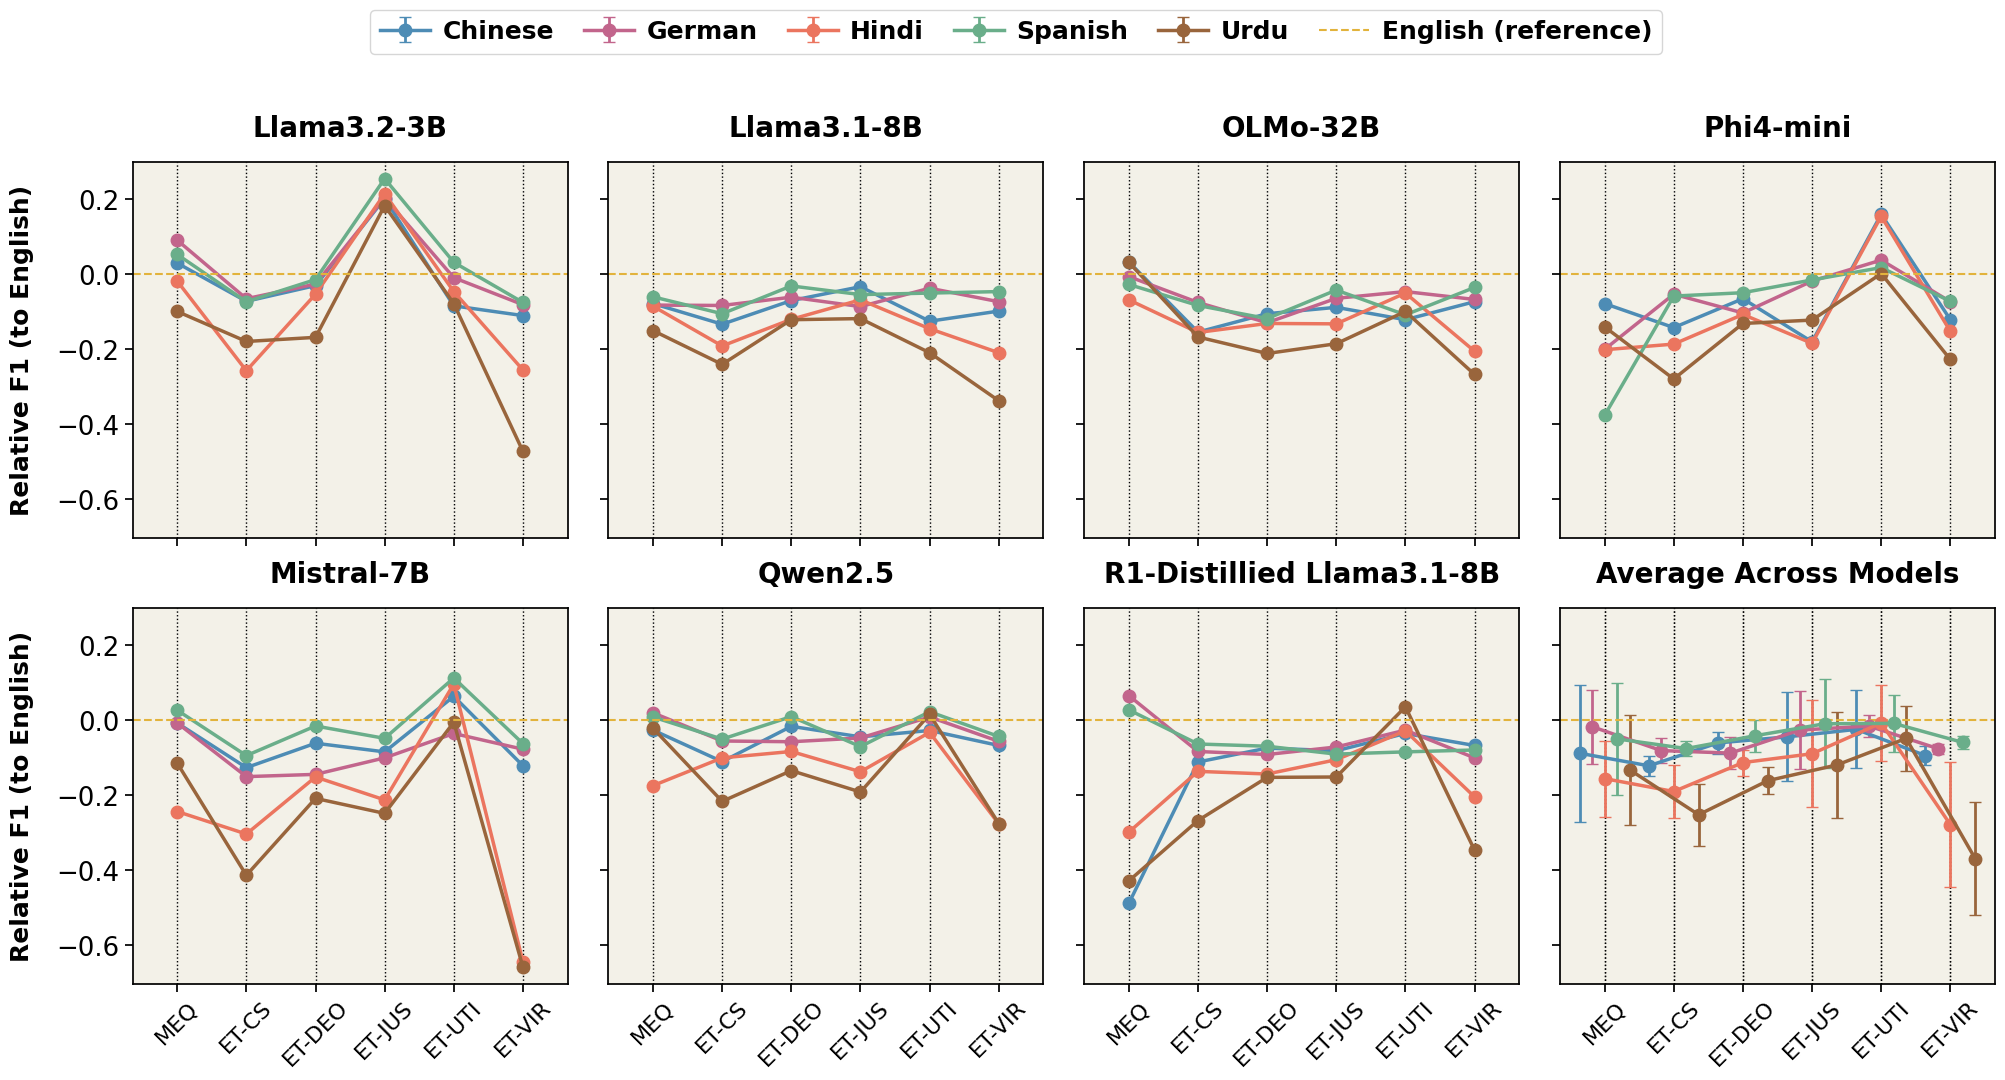

In [ ]:
import numpy as np
from matplotlib.lines import Line2D
import pandas as pd
import matplotlib.pyplot as plt

dfs = [results_moralexceptqa, results_ethics_cs, results_ethics_deo, results_ethics_justice, results_ethics_util, results_ethics_virtue]
dataset_names = ['MEQ', 'ET-CS', 'ET-DEO', 'ET-JUS', 'ET-UTI', 'ET-VIR']

all_f1_dfs = []
for i, df in enumerate(dfs):
    dataset_name = dataset_names[i]
    f1_cols = [col for col in df.columns if col.endswith('_f1')]
    df_f1 = df.melt(id_vars='model', value_vars=f1_cols, var_name='language', value_name='f1_score')
    df_f1['language'] = df_f1['language'].str.replace('_f1', '')
    df_f1['dataset'] = dataset_name
    all_f1_dfs.append(df_f1)

combined_f1_df = pd.concat(all_f1_dfs, ignore_index=True)

model_display_names = [
    "Llama3.2-3B",
    "Llama3.1-8B",
    "OLMo-32B",
    "Phi4-mini",
    "Mistral-7B",
    "Qwen2.5",
    "R1-Distillied Llama3.1-8B",
    "Average Across Models"
]

model_code_to_display = dict(zip(model_names, model_display_names[:-1]))

languages_no_english = ['chinese', 'german', 'hindi', 'spanish', 'urdu']
language_display_names = {
    'chinese': 'Chinese',
    'german': 'German',
    'hindi': 'Hindi',
    'spanish': 'Spanish',
    'urdu': 'Urdu'
}

dataset_order = dataset_names
model_order = model_names

language_colors = {
    'chinese': '#4D8CB5',
    'german':  '#C2658C',
    'hindi':   '#EB755F', 
    'spanish': '#6AAE8A',
    'urdu':    '#99653C',
}

rel_df = combined_f1_df.copy()
def get_english_f1(group):
    english_f1 = group[group['language'] == 'english']['f1_score'].values[0]
    group = group.copy()
    group['rel_f1'] = group['f1_score'] - english_f1
    return group
rel_df = rel_df.groupby(['dataset', 'model'], group_keys=False).apply(get_english_f1)

rel_df_no_english = rel_df[rel_df['language'] != 'english'].copy()

rel_df_no_english['subplot'] = rel_df_no_english['model']

avg_df = rel_df_no_english.groupby(['dataset', 'language'])['rel_f1'].agg(['mean', 'std']).reset_index()
avg_df['subplot'] = 'Average Across Models'

plot_df = pd.concat([
    rel_df_no_english,
    avg_df.rename(columns={'mean': 'rel_f1'})
], ignore_index=True)

subplot_order = list(model_order) + ['Average Across Models']

import seaborn as sns
sns.set_context("notebook", font_scale=1.7)
g = sns.FacetGrid(
    plot_df, 
    col="subplot", 
    col_wrap=4, 
    height=5, 
    sharey=True, 
    col_order=subplot_order,
    despine=False
)

def lineplot_func(data, color, **kwargs):
    subplot_name = data['subplot'].iloc[0]
    legend_labels = [language_display_names[lang] for lang in languages_no_english]
    if subplot_name != 'Average Across Models':
        for lang, disp_lang in zip(languages_no_english, legend_labels):
            lang_data = data[data['language'] == lang]
            yvals = [lang_data[lang_data['dataset'] == ds]['rel_f1'].values[0] if not lang_data[lang_data['dataset'] == ds].empty else None for ds in dataset_order]
            plt.plot(
                dataset_order, yvals, marker='o', label=disp_lang, linewidth=2.5, markersize=9,
                color=language_colors[lang]
            )
        plt.axhline(0, color='#E2B33C', linestyle='--', linewidth=1.5, label='English (reference)')
        for x in range(len(dataset_order)):
            plt.axvline(x, color='#e0e0e0', linestyle=':', linewidth=1, zorder=0)
    else:
        width = 0.18 
        n_langs = len(languages_no_english)
        offsets = np.linspace(-width*(n_langs-1)/2, width*(n_langs-1)/2, n_langs)
        for i, (lang, disp_lang) in enumerate(zip(languages_no_english, legend_labels)):
            lang_data = data[data['language'] == lang]
            means = []
            stds = []
            for ds in dataset_order:
                row = lang_data[lang_data['dataset'] == ds]
                if not row.empty:
                    means.append(row['rel_f1'].values[0])
                    stds.append(row['std'].values[0])
                else:
                    means.append(np.nan)
                    stds.append(0)
            x = np.arange(len(dataset_order)) + offsets[i]
            plt.errorbar(
                x, means, yerr=stds, marker='o', label=disp_lang, capsize=4, linewidth=2.5, markersize=9,
                color=language_colors[lang], ecolor=language_colors[lang], elinewidth=2
            )
        plt.axhline(0, color='#E2B33C', linestyle='--', linewidth=1.5, label='English (reference)')
        for x in range(len(dataset_order)):
            plt.axvline(x, color='#e0e0e0', linestyle=':', linewidth=1, zorder=0)
        plt.xticks(np.arange(len(dataset_order)), dataset_order, rotation=45, fontsize=16)

g.map_dataframe(lineplot_func)

for ax, subplot_name in zip(g.axes.flatten(), subplot_order):
    if subplot_name == 'Average Across Models':
        title = model_display_names[-1]
    else:
        title = model_code_to_display.get(subplot_name, subplot_name)
    ax.set_title(title, fontsize=20, fontweight='bold', pad=18)
    ax.set_xticks(range(len(dataset_order)))
    ax.set_xticklabels(dataset_order, rotation=45, fontsize=16)
    ax.set_xlabel('')
    ax.set_ylabel('')
    if subplot_name == subplot_order[-1]:
        handles, labels = ax.get_legend_handles_labels()
        unique = {}
        for h, l in zip(handles, labels):
            if l not in unique:
                unique[l] = h
        english_label = 'English (reference)'
        if english_label not in unique:
            english_handle = Line2D([0], [0], color='#E2B33C', linestyle='--', linewidth=1.5)
            unique[english_label] = english_handle
        lang_labels = [language_display_names[lang] for lang in languages_no_english]
        legend_order = lang_labels + [english_label]
        legend_handles = [unique[l] for l in legend_order if l in unique]
        ax.legend(
            legend_handles, legend_order, title='',
            loc='upper center', bbox_to_anchor=(-1.25, 2.6),
            ncol=len(languages_no_english)+1, frameon=True,
            fontsize=18, title_fontsize=18, borderaxespad=0.2, handletextpad=0.5, columnspacing=1.2
        )
        for text in ax.get_legend().get_texts():
            text.set_fontweight('bold')
        if ax.get_legend().get_title() is not None:
            ax.get_legend().get_title().set_fontweight('bold')
    else:
        ax.legend([],[], frameon=False)
    for x in range(len(dataset_order)):
        ax.axvline(x, color='#e0e0e0', linestyle=':', linewidth=1, zorder=0)

g.set_axis_labels("Dataset", "Relative F1 (to English)")
g.set_xlabels("", fontsize=18, labelpad=16, fontweight='bold')
g.set_ylabels("Relative F1 (to English)", fontsize=18, labelpad=16, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig("FinalPlots/language_relative_f1_subplots.pdf", bbox_inches='tight')
plt.show()